# > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline
import seaborn as sns

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

^C


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

In [3]:
def data_check():
    """check all information about the data (nulls, duplicated, data types, .etc) in this function """
    
    # checking number of nulls in every columns 
    print('data inofrmation:\n {}'.format(df.info()))
    # number of duplicated rows
    print('number of duplicated rows:\n {}'.format(df.duplicated().sum()))
    # data describtion 
    print('data describtion:\n {}'.format(df.describe()))
    

In [13]:
run_once = False

def clean_data():
   
    """cleaned, perform cleaning steps in this function"""

    # drop the useless columns 
    df.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview','director'], axis=1, inplace=True)

    # drop the duplicated rows
    df.drop_duplicates(inplace=True)

    # drop nulls in both od production comanies and genres
    df.dropna(subset=['production_companies','genres'],inplace=True)

    # convert release date from object to datetime formate
    df['release_date'] = pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: what are the films have the highest budget ?

In [5]:
def high_budegt_movie():
    
    """ this function to display and plot movies got the highest budget every year. """
    
    # create a dataframe have the the highest budget every year and the name of film and the revenue
    year = list(range(1960,2016))
    budget = []
    revenue = []
    film_title = []
    year_title = []
    
    for i in year:
        budget.append(df[df.release_year == i].budget.max())
        film_title.append(df[(df.release_year == i) & (df.budget == budget[-1])].original_title.values[0])
        revenue.append(df[(df.release_year == i) & (df.budget == budget[-1])].revenue.values[0])
        
    # convert the columns to dataframe
    budget = pd.DataFrame(budget)
    year = pd.DataFrame(year)
    revenue = pd.DataFrame(revenue)
    film_title = pd.DataFrame(film_title)

    #cocatenate the columns together
    highest_budget = pd.concat([year,budget, film_title, revenue], axis=1)
    # rename the columns 
    new_labels = list(highest_budget.columns)
    new_labels[0] = 'Year'
    new_labels[1] = 'Budget'
    new_labels[2] = 'Title'
    new_labels[3] = 'Revenue'
    highest_budget.columns = new_labels
    
    # create new column to merge the Movie title and the year (Title_2006 for ex)
    for index, row in highest_budget.iterrows():
        year_title.append(row['Title'] + ' (' + str(row['Year']) + ')')
    year_title = pd.DataFrame(year_title)
    highest_budget = pd.concat([highest_budget,year_title], axis=1)
    # rename the new column 
    new_labels = list(highest_budget.columns)
    new_labels[4] = 'Title_Year'
    highest_budget.columns = new_labels
    
    # display the tabel     
    print('The movies of highest budget every Year: /n {}'.format(highest_budget))
    
    # plot the  bars for every years
    plt.figure(figsize=(15,8))
    plt.bar(highest_budget.loc[:,'Title_Year'], highest_budget.loc[:,'Budget'], color='blue', width=0.5)
    plt.xticks(rotation=90)
    plt.title('The highest budget every year')
    plt.xlabel('Year')
    plt.ylabel('Budget')
    plt.show()

we notice that the budget of the movies is in positive corellation with the years and that was excepected.
the lagest budget in the dataset was in 2010 for (The Worrior's Way) with budget = 425000000

### Research Question 2: what are the films have the highest revenue every year ?

In [6]:
def high_revenue_movie():
   
    """ this function to display and plot movies got the highest budget every year. """
    
    # create a dataframe have the the highest budget every year and the name of film and the revenue
    year = list(range(1960,2016))
    revenue = []
    film_title = []
    year_title = []

    for i in year:
        revenue.append(df[df.release_year == i].revenue.max())
        film_title.append(df[(df.release_year == i) & (df.revenue == revenue[-1])].original_title.values[0])

    # convert the columns to dataframe
    year = pd.DataFrame(year)
    revenue = pd.DataFrame(revenue)
    film_title = pd.DataFrame(film_title)


    #cocatenate the columns together
    highest_revenue = pd.concat([year,film_title, revenue], axis=1)
    # rename the columns 
    new_labels = list(highest_revenue.columns)
    new_labels[0] = 'Year'
    new_labels[1] = 'Title'
    new_labels[2] = 'Revenue'
    highest_revenue.columns = new_labels

    # create new column to merge the Movie title and the year (Title_2006 for ex)
    for index, row in highest_revenue.iterrows():
        year_title.append(row['Title'] + ' (' + str(row['Year']) + ')')
    year_title = pd.DataFrame(year_title)
    highest_revenue = pd.concat([highest_revenue,year_title], axis=1)
    
    # rename the new column
    new_labels = list(highest_revenue.columns)
    new_labels[3] = 'Title_Year'
    highest_revenue.columns = new_labels
    
    # diplay the table
    print('The movies of highest revenue every Year: /n {}'.format(highest_revenue))
    
    # plot the data
    plt.figure(figsize=(15,8))
    plt.bar(highest_revenue.loc[:,'Title_Year'], highest_revenue.loc[:,'Revenue'], color='green', width=0.5)
    plt.xticks(rotation=90)
    plt.title('The highest revenue every year')
    plt.xlabel('Year')
    plt.ylabel('Revenue')
    plt.show()

the highest revenue on the dataset in 1997 for Titanic movie with got revenues = 1845034188

### Research Question 3: what is the relation between the vote average and the budget?

In [7]:
def budget_vote_avg():
    
    """ this function to find the relation between the budget of the movies and the votes average."""
    
    # remove the movies with budget equal 0
    df_v2 = df[df.budget != 0]
    df_v2 = df_v2[df_v2.vote_average >= 1]
    votes = df_v2['vote_average']
    budget = df_v2['budget']
    
    # plot the data
    fig = plt.figure(figsize = (15,8))
    plt.scatter(budget,votes,c='cyan')
    plt.title('films budgets V.S films rating')
    plt.xlabel('budget')
    plt.ylabel('votes average')
    plt.show()

the votes average doesn't increase by increase the budget of the movies.
we notice that the movies that got the highest votes average have the lowest average in the dataset.

### Research Question 4: what is the average of revenues for each production company from 1960 to 2015?

In [8]:
def prod_avg_revenue():
    
    """the average of revenues for each production company for 1960 to 2015"""
    
    # split for the first '|' to get the primer company
    for i in range(len(df)):
        df.iloc[i,7] = df.iloc[i,7].split("|")[0]

    # re organize the data to be grouped by production companies
    avg_prod_rev = df.groupby(['production_companies'])['revenue'].mean()
    # pick only the data that doesn't equal zero
    avg_prod_rev = avg_prod_rev[avg_prod_rev != 0]
    avg_prod_rev = pd.DataFrame(avg_prod_rev)
    avg_prod_rev.sort_values(by=['revenue'], ascending=False, inplace=True)
    
    # dispay the tabel
    print('average revenues of production compaies: \n {}'.format(avg_prod_rev))

the cool music company have the highest average revenue with value = 9.382127e+8.

### Research Question 5: which production companies have the highest popularity movies?

In [9]:
def popularity_prod():
    
    """ this function to check average of popularity for every producftion company"""

    # reorgaize the data to be grouped by production companies 
    avg_prod_pop = df.groupby(['production_companies'])['popularity'].mean()
    avg_prod_pop = avg_prod_pop[avg_prod_pop >= 1]
    avg_prod_pop = pd.DataFrame(avg_prod_pop)
    avg_prod_pop.sort_values(by=['popularity'], ascending=False, inplace=True)
    
    # print the data 
    print('the average of popularity tabel for every production company:\n{}'.format(avg_prod_pop))
    
    # plot the data
    plt.figure(figsize=(15,8))
    plt.bar(avg_prod_pop.index[0:50], avg_prod_pop.iloc[0:50,0], color='red', width=0.5)
    plt.xticks(rotation=90)
    plt.title('Average of popularity for the highest 50 companies ')
    plt.xlabel('production companies')
    plt.ylabel('Popularity')
    plt.show()

this chart present the highest 50 companies according to popularity in dataset.
the highest company is (Patalex IV Productions Limited) with average popularity = 5.939927

check the data first step in wrangling 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 no

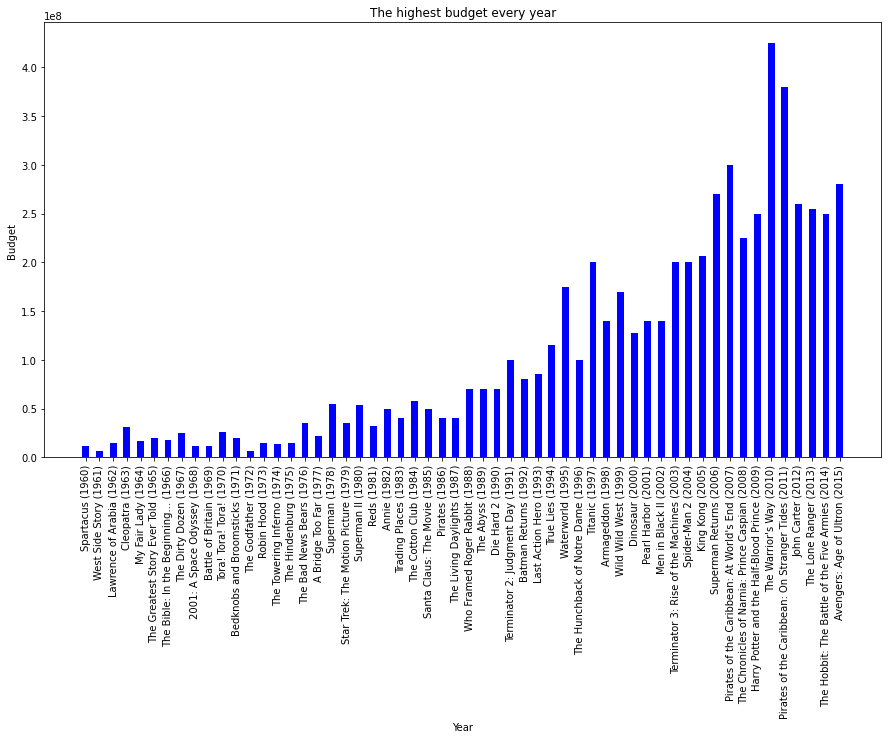

movies got the highest revenue every year
The movies of highest revenue every Year: /n     Year                                          Title     Revenue  \
0   1960                                      Spartacus    60000000   
1   1961                 One Hundred and One Dalmatians   215880014   
2   1962                             Lawrence of Arabia    70000000   
3   1963                          From Russia With Love    78898765   
4   1964                                     Goldfinger   124900000   
5   1965                             The Sound of Music   163214286   
6   1966                Who's Afraid of Virginia Woolf?    33736689   
7   1967                                The Jungle Book   205843612   
8   1968                          2001: A Space Odyssey    56715371   
9   1969             Butch Cassidy and the Sundance Kid   102308889   
10  1970                                     Love Story   136400000   
11  1971                           Diamonds Are Forever   116

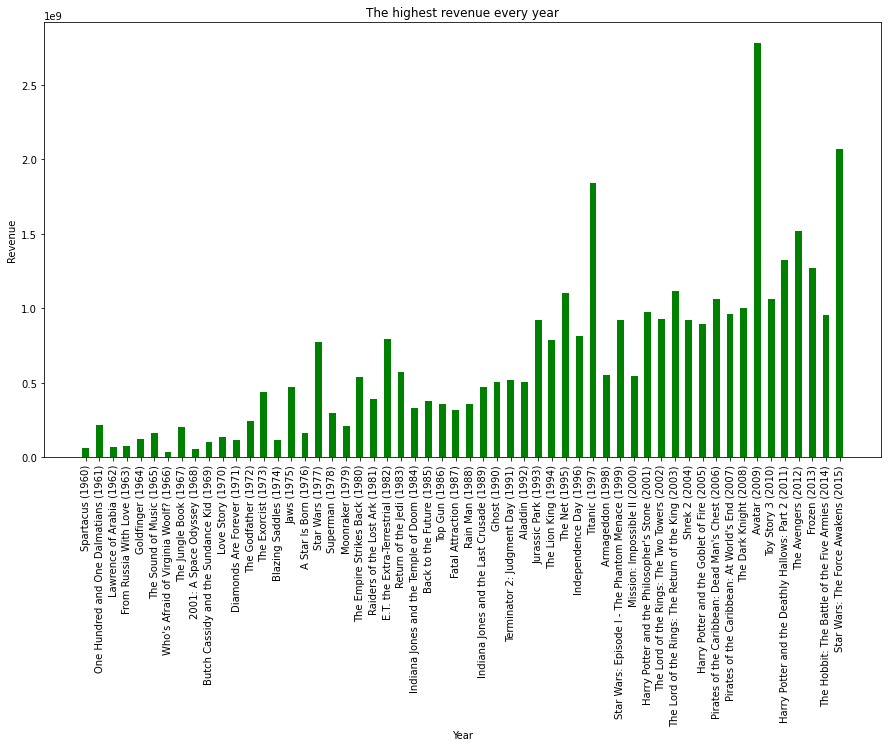

the relation between the budget of the movies and the votes average 



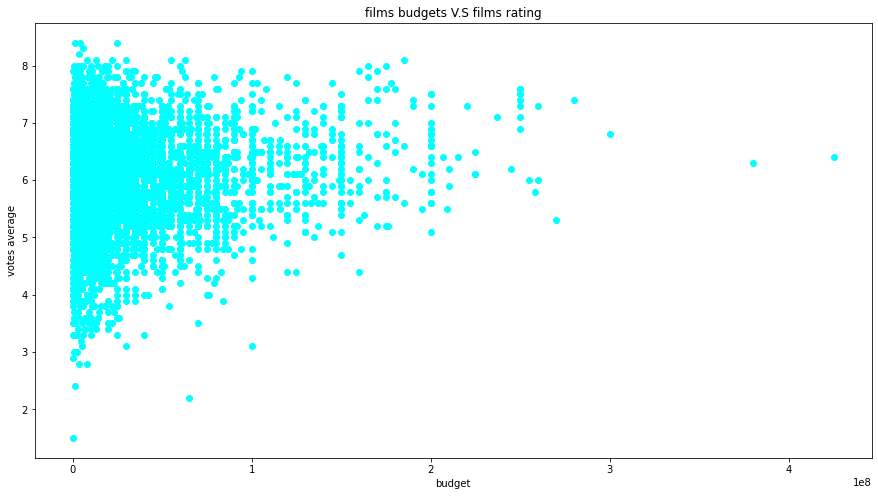

average of revenues for each production company for 1960 to 2015
average revenues of production compaies: 
                                      revenue
production_companies                        
Cool Music                      9.382127e+08
Patalex IV Productions Limited  8.959210e+08
1492 Pictures                   7.043868e+08
WingNut Films                   4.810046e+08
Lucasfilm                       4.109053e+08
...                                      ...
Pathe Productions               2.300000e+01
Filmhuset Gruppen               1.100000e+01
chateau productions             1.100000e+01
Tales From The Crypt Holdings   5.000000e+00
Studio 4Â°C                     1.250000e+00

[1183 rows x 1 columns]
average of popularity for every producftion company
the average of popularity tabel for every production company:
                                popularity
production_companies                      
Patalex IV Productions Limited    5.939927
Thunder Road Pictures             5.911

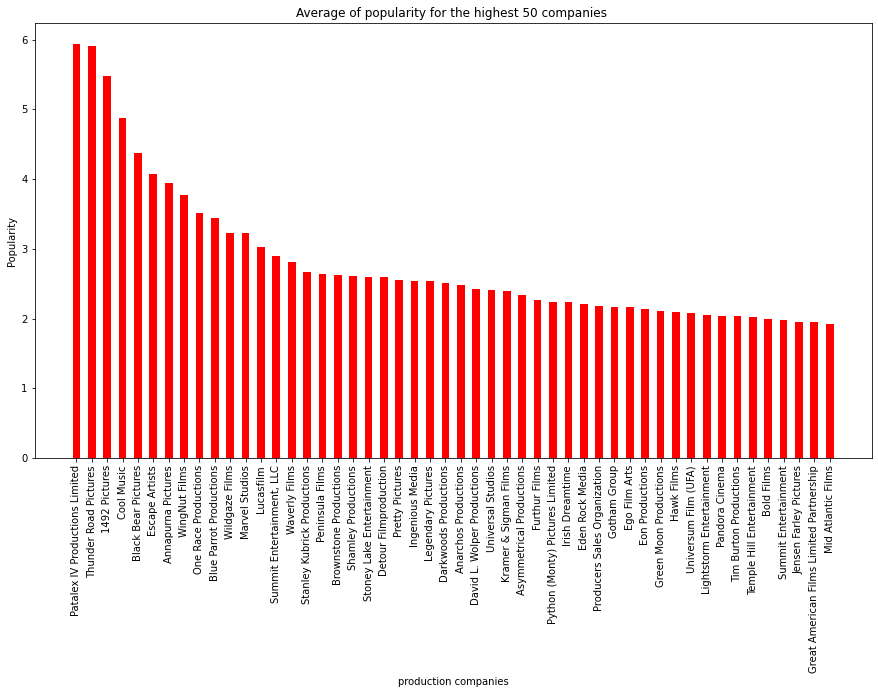

In [14]:
def main():
    
    print('check the data first step in wrangling \n')
    data_check()
    print('clean the data second step in wrangling \n')
    global run_once
    if run_once == False:
        clean_data()
        run_once = True
    print('check the data after cleaning')
    data_check()
    print('movies got the highest budget every year \n')
    high_budegt_movie()
    print('movies got the highest revenue every year')
    high_revenue_movie()
    print('the relation between the budget of the movies and the votes average \n')
    budget_vote_avg()
    print('average of revenues for each production company for 1960 to 2015')
    prod_avg_revenue()
    print('average of popularity for every producftion company')
    popularity_prod()
    
if __name__ == "__main__":
    main()

<a id='conclusions'></a>
## Conclusions

> **Summary**: 
[1] the budget of the movies is in positive corellation with the years and that was excepected. the lagest budget in the dataset was in 2010 for (The Worrior's Way) with budget = 425000000.
[2] the highest revenue on the dataset in 1997 for Titanic movie with got revenues = 1845034188.
[3] the votes average doesn't increase by increase the budget of the movies. we notice that the movies that got the highest votes average have the lowest average in the dataset.
[4] the cool music company have the highest average revenue with value = 9.382127e+8.
[5]  the highest company is (Patalex IV Productions Limited) with average popularity = 5.939927.

> **Limitations**:
[1] the alot of missing data like zeros and nulls was an obstacle to analysis operation.
[2] wanted to classify the movies and budgest and revenues based on the categories (genres) of movies but this was a big work.



In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295